# EE4375-2022: Sixth Lab Session: Galerkin Finite Element Method for the Poisson Equation on the Unit Square 

 Solves the Poisson equation $- \bigtriangleup u = f$ on the unit square domain $\Omega=(0.,1.0)^2$ supplied with the homogeneous Dirichlet boundary condition $u = 0$ on $\Gamma$. The computational domain is kept simple on purpose for illustration purposes. The source function $f$ is defined as the sourcefct in what follows. Linear finite elements on triangular elements are used. The mesh is generated using the mesh generation software called gmsh (see [Gmsh](https://gmsh.info)). More information on the use of GMSH is provided at [extended-lab-sessions/gmsh](https://github.com/ziolai/finite_element_electrical_engineering/tree/main/extended-lab-sessions/gmsh).

## Import Packages

In [6]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using Plots
using LaTeXStrings

## Section 1: Geometry and Mesh Generation of Unit Square Geometry 
The code that follows performs mesh generation on the unit square geometry. 

First the geometry is generated in the following four steps:
1. four corner points of the square are defined. The points are labeled as 1 through 4;
2. four lines are defined as the edges of the square are defined by connecting previously defined points. Edges are formed by connecting points pairwise. The lines are given a start and end point. The lines are thus oriented. The edges are labeled as 5 through 8. Points and edges are numbered consequitively;  
3. the boundary of the square is defined by a loop connecting the four edges. The orientation of the edges given an orientation to the loop. The loop is oriented such that an imaginary observer walking on the loop finds the domain on his left-hand side. The loop is labeled as 9;  
4. the surface of the square is defined by the loop. It is on this square that the mesh generation will take place. This square is labeled as 10; 

Next the mesh on the geometry is defined by mesh generation. The mesh is generated by first meshing the four edges of the square. The mesh is subsequently propagated towards the interior of the square. The mesh density is controlled by the parameter lc. This parameter specifies the number of elements on the line. 

The mesh is optionally written to file and visualized using the GUI. 

<b>Exercises </b>: 
1. change coordinate of one of the points and regenerate the mesh;
2. change the mesh density by changing the value of the parameter lc and regenerate the mesh. Apply different mesh density on one or more edges of the square; 
3. extend the code to the generation of a mesh on a pentagon; 
4. extend the code to the generation of a mesh on an L-shaped domain; 
5. extend the code to the generation of a mesh on a square with an inner square removed this practising the orientation of the loops; 
6. share imagines of the meshes obtained of social media of choice and notify your favorite finite element instructor; 

In [18]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("t1")
#..set mesh density parameter 
lc = 1e-1
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 5)
gmsh.model.geo.addLine(2, 3, 6)
gmsh.model.geo.addLine(3, 4, 7)
gmsh.model.geo.addLine(4, 1, 8)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 9)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([9], 10)
#..give label to the surface 
gmsh.model.setPhysicalName(2, 11, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()
#..generate two-dimensional mesh 
gmsh.model.mesh.generate(1)
#..if true, write mesh to file for further processing 
if (false) gmsh.write("t1.msh") end 
#..if true, visualize mesh through the GUI 
if (true) gmsh.fltk.run() end 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.000353125s, CPU 0.000334s)
Info    : 40 nodes 44 elements
-------------------------------------------------------
Version       : 4.10.2
License       : GNU General Public License
Build OS      : MacOSX-sdk
Build date    : 19700101
Build host    : amdci7
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.6.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/g

In [13]:
?gmsh.model.mesh.generate

```
gmsh.model.mesh.generate(dim = 3)
```

Generate a mesh of the current model, up to dimension `dim` (0, 1, 2 or 3).


## Section 2:/ Extract Data from the Mesh and Perform a FEM Computation  
Exercises: 
1. study the assembly of the vector;
2. study the assembly of the matrix; 

In [20]:
gmsh.initialize()

In [24]:
#..1/11 Generate the mesh
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("t1")
lc = 1e-1
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
gmsh.model.geo.addLine(1, 2, 5)
gmsh.model.geo.addLine(2, 3, 6)
gmsh.model.geo.addLine(3, 4, 7)
gmsh.model.geo.addLine(4, 1, 8)
gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 9)
gmsh.model.geo.addPlaneSurface([9], 10)
gmsh.model.setPhysicalName(2, 11, "My surface")
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
if (false) gmsh.write("t1.msh") end 

#..2/11 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..3/11 Plotting the mesh
if (false) gmsh.fltk.run() end 

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 30%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.000636167s, CPU 0.000511s)
Info    : Meshing 2D...
Info    : Meshing surface 10 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0058795s, CPU 0.005803s)
Info    : 142 nodes 286 elements


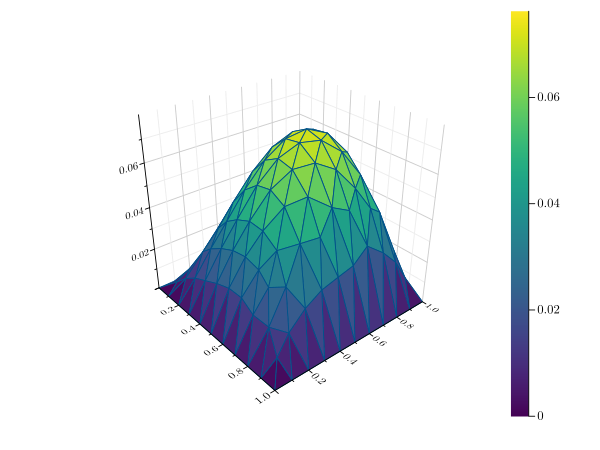

In [25]:
#..4/11 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/11 Define the source function and apply the source function to the local coordinates
sourcefunction(x,y) = x+y
fvalues = map(sourcefunction, xnode, ynode)

#..6/11 initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/11 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  x12 = xnode2 - xnode1; x13 = xnode3-xnode1;
  y12 = ynode2 - ynode1; y13 = ynode3-ynode1;
  area_id = x12*y13 - x13*y12; area_id = abs(area_id)/2

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end

  #....compute local vector contribution floc of the current element
  floc = area_id/3*[fvalues[node1_id]; fvalues[node2_id]; fvalues[node3_id]]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);

  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  for i = 1:3
  I = element_connectivity[1][3*(element_id-1)+i]
    f[I] += floc[i]
    for j = 1:3
      J = element_connectivity[1][3*(element_id-1)+j]
      A[I,J] += Aloc[i,j]
    end
  end

end

#..8/11 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,5)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,6)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,7)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,8)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/11 Compute the numerical solution
u = A\f

#..10/11 Plot the numerical solution
# tricont(xnode,ynode,u)
trisurf(xnode,ynode,u)